In [7]:
# !pip install librosa
# !pip install glob
# !pip install keras
# !pip install tensorflow

In [27]:
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:
def display_mfcc(song):
    y,_ = librosa.load(song)
    mfcc = librosa.feature.mfcc(y)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()

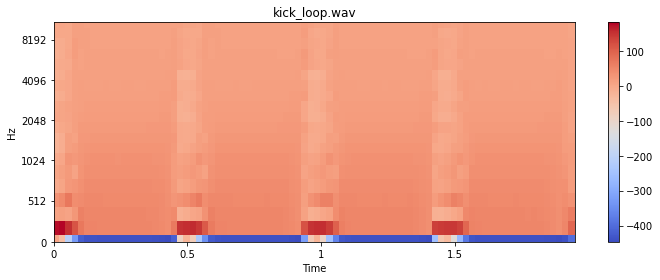

In [13]:
display_mfcc('kick_loop.wav')

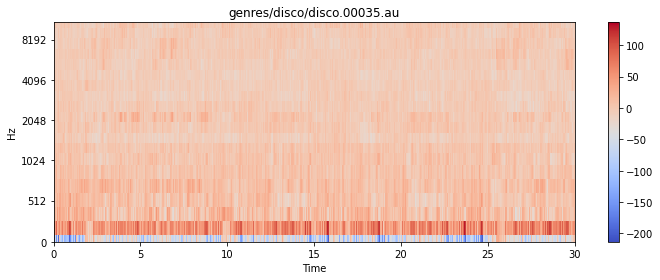

In [15]:
display_mfcc('genres/disco/disco.00035.au')

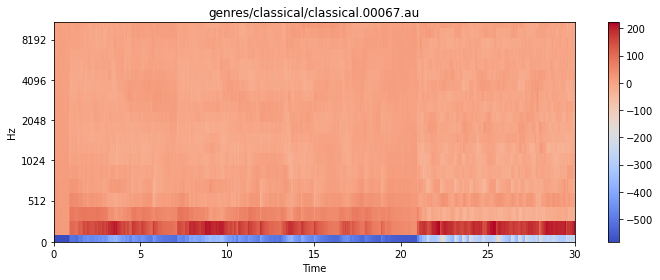

In [18]:
display_mfcc('genres/classical/classical.00067.au')

In [19]:
def extract_features_song(f):
    y,_ = librosa.load(f)
    
    mfcc = librosa.feature.mfcc(y)
    mfcc /= np.amax(np.absolute(mfcc))
    return np.ndarray.flatten(mfcc)[:25000]

In [25]:
def generate_features_and_labels():
    all_features=[]
    all_labels=[]
    
    genres=['blues','classical','country'
            ,'disco','hiphop','jazz','metal'
            ,'pop','reggae','rock']
    for genre in genres:
        sound_files = glob.glob('genres/' + genre + '/*.au')
        print('Processing %d songs in %s genre...' % (len(sound_files),genre))
        
        for f in sound_files:
            feature = extract_features_song(f)
            all_features.append(feature)
            all_labels.append(genre)
            
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels

In [26]:
features, labels = generate_features_and_labels()

Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...


In [31]:
print(np.shape(features))
print(np.shape(labels))
all_data = np.column_stack((features,labels))

data_train, data_test, label_train, label_test = train_test_split(features, labels, test_size=0.2, train_size=0.8,
                                                          shuffle=True)

(1000, 25000)
(1000, 10)


In [35]:
model = Sequential([
    Dense(100, input_dim=np.shape(data_train)[1]),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

model.fit(data_train,label_train, epochs=10, batch_size=32,
          validation_split=0.2)

loss, acc = model.evaluate(data_test, label_test, batch_size=32)

print('Done')
print('Loss: %4f, Accuracy: %4f' % (loss,acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               2500100   
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 2,501,110
Trainable params: 2,501,110
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
20/20 [==============================] - 14s 52ms/step - loss: 2.3248 - accuracy: 0.2336 - val_loss: 1.8365 - val_accuracy: 0.2937
Epoch 2/10
20/20 [==============================] - 0s 15ms/step - loss: 1.5784 - accuracy: 0.5